In [67]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

from sympy import symbols, Eq, nonlinsolve, lambdify

**Exercise 12.1.**  The weighted sum method is a very simple approach, and it is indeed used by engineers for multiobjective optimization. What is one disadvantage of the procedure when it is used to compute the Pareto frontier?

**Answer:** To get the frontier you must search for all combinations of weights. In two dimensions this is rather possible but in higher dimensions you run in to the curse of dimensionality.

**Exercise 12.2.**  Why are population methods well-suited for multiobjective optimization?

**Answer:** Populations methods by it's very nature generates a set of solutions. This set can be used to find the Pareto frontier. Also the population methods are well suited for parallelization which is a big advantage when dealing with multiobjective optimization.

**Exercise 12.3.**  Exercise 12.3. Suppose you have the points $\left\{ [1,2], [2,1], [2,2], [1,1]\right\}$ in the criterion space and you wish to approximate a Pareto frontier. Which points are Pareto optimal with respect to the rest of the points? Are any weakly Pareto-optimal points?

**Answer:** First we can plot the points in the criterion space.

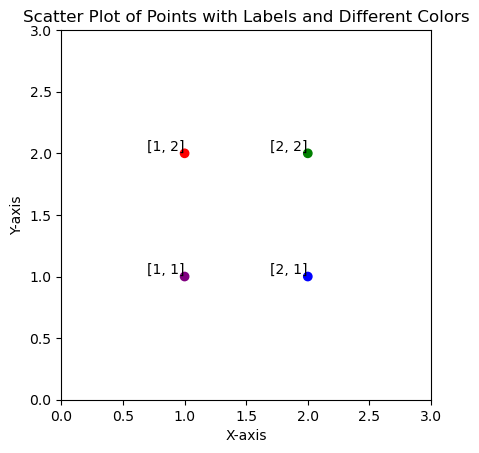

In [68]:

# Given points and corresponding labels
points = [[1, 2], [2, 1], [2, 2], [1, 1]]
labels = ['[1, 2]', '[2, 1]', '[2, 2]', '[1, 1]']

# Extract x and y coordinates
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Define colors for each point
colors = ['red', 'blue', 'green', 'purple']

# Plot the points with different colors
plt.scatter(x_coords, y_coords, c=colors)

# Annotate each point with its label
for label, x, y in zip(labels, x_coords, y_coords):
    plt.text(x, y, label, ha='right', va='bottom')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points with Labels and Different Colors')

plt.xlim(0, 3)
plt.ylim(0, 3)

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The point $[1,1]$ is the Pareto optimal. Both the points $[1,2]$ and $[2,1]$ are weakly Pareto optimal.

**Exercise 12.4.**  Multiobjective optimization is not easily done with second-order methods. Why is this the case?

**Answer:** usually the gradient is a vector and the Hessian is a matrix. In multiobjective optimization the gradient is a matrix and the Hessian is some sort of tensor. This makes the second-order methods very complex.

**Exercise 12.5.**  Consider a square criterion space $\mathcal{Y}$ with $y_1\in[0,1]$ and $y_2\in[1,0]$. Plot the criterion space, indicate the Pareto-optimal points, and indicate the weakly Pareto optimal points.

**Answer:** 

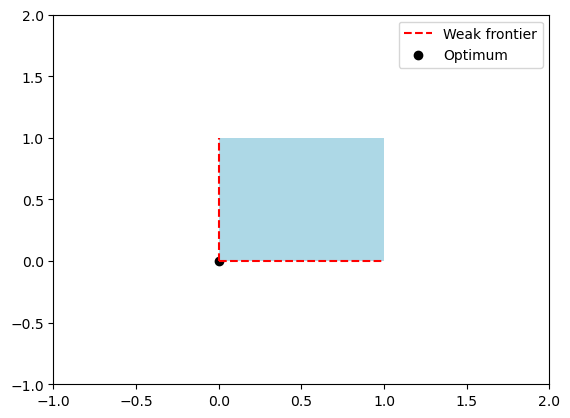

In [69]:
# Define the diagonal corners
corner1 = [0, 1]
corner2 = [1, 0]

# Calculate width and height of the square
width = corner2[0] - corner1[0]
height = corner2[1] - corner1[1]

# Create a rectangle patch
rectangle = patches.Rectangle(corner1, width, height, linewidth=1,facecolor='lightblue')

# Add frontier
plt.hlines(0, 0, 1, colors='red', linestyles='dashed', label='Weak frontier')
plt.vlines(0, 0, 1, colors='red', linestyles='dashed')
plt.scatter(0, 0, c='black', label='Optimum')

# Add the rectangle to the axis
plt.gca().add_patch(rectangle)

# Show the plot
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.legend()
plt.show()


**Exercise 12.6.**  Exercise 12.6. Enforcing $\mathbf{w}\leq\mathbf{0}$  and $||\mathbf{w}||_1=1$  in the weighted sum method is not sufficient for Pareto optimality. Give an example where coordinates with zero-valued weights find weakly Pareto-optimal points.

**Answer:** The constraint we have on $\mathbf{w}$ is that is must ne non-negative and sum to 1. So we can set weights to zero. If the criterion space is parrallel to the axis we can find weakly Pareto-optimal points we can vary the x point accordingly and get a weakly Pareto-optimal point since we only improve on objective with out improving on the other, which is the definition of weakly Pareto-optimal.

**Exercise 12.7.**  Provide an example where goal programming does not produce a Pareto-optimal point.

**Answer:** Since we can place the goal value anywhere we can placce it inside (and not on the boundary) the criterion space. This will produce a point that is not Pareto-optimal.

**Exercise 12.8.**  Use the constraint method to obtain the Pareto curve for the optimization problem:

$$
\begin{align}
\min_{x_1,x_2} \quad & \left[x^2, (x-2)^2\right]
\end{align}
$$

**Answer:** Lets rewrite the problem as

$$
\begin{align}
\min_{x} \quad & (x-2)^2 \\
\text{s.t.} \quad & x^2 \leq c
\end{align}
$$

The Lagrangian is

$$
\begin{align}
L(x,\lambda) = (x-2)^2 + \lambda(x^2-c)
\end{align}
$$

The KKT conditions are

$$
\begin{align}
\frac{\partial L}{\partial x} = 2(x-2) + 2\lambda x = 0 \\
\frac{\partial L}{\partial \lambda} = x^2 - c = 0 \\
\lambda \geq 0 \\
\lambda(x^2-c) = 0
\end{align}
$$

In [70]:
# Define variables
x, l, c = symbols('x l c')

# Define the equations
equation1 = Eq(2*(x - 2) + 2*l*x, 0)
equation2 = Eq(x**2 - c, 0)
equation3 = l*(x**2 - c) == 0


# Solve the system of equations
solution = nonlinsolve((equation1, equation2, equation3), (x, l))
solution

{(-sqrt(c), (-2*sqrt(c) - 4)/(2*sqrt(c))), (-sqrt(c), -(sqrt(c) + 2)/sqrt(c)), (sqrt(c), -(sqrt(c) - 2)/sqrt(c)), (sqrt(c), -(2*sqrt(c) - 4)/(2*sqrt(c)))}

In [71]:
solution.args[0][-1].simplify()

-1 + 2/sqrt(c)

In [72]:
solution.args[1][-1].simplify()

-1 - 2/sqrt(c)

As we can see $c>0$ must hold. And lambda must be the form $\lambda = -1 + \frac{2}{\sqrt(c)}$. This equation is only positive when $c<4$. If $c>4$ then $x = 2$.

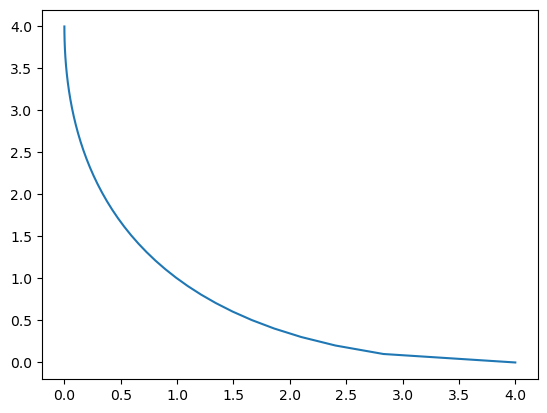

In [73]:
def optimal_x(c):
    if c >= 4:
        return 2
    elif c < 4 and c >= 0:
        return np.sqrt(c)
    else:
        raise ValueError('c must be greater than or equal to 0')

def f1(x):
    return (x - 2)**2

def f2(x):
    return x**2

c = np.linspace(0, 10, 100)
x = np.array([optimal_x(c_i) for c_i in c])

plt.plot(f1(x),f2(x), label='Pareto frontier')
plt.show()

**Exercise 12.9.**  Suppose we have a multiobjective optimization problem where the two objectives are as follows:

$$
\begin{align}
f_1(x) &= -(x-2)\sin(x) \\
f_2(x) &= -(x+3)^2\sin(x) 
\end{align}
$$

With $x\in{-5,-3,-1,1,3,5}$, plot the points in the criterion space. How many points are on the Pareto frontier?

**Answer:**

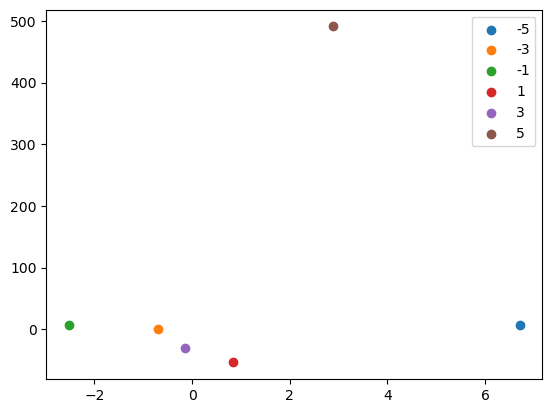

In [74]:
x = np.array([-5,-3,-1,1,3,5])

def f1(x):
    return -(x-2)*np.sin(x)

def f2(x):
    return -(x+3)**3*np.sin(x)
for i in x:
    plt.scatter(f1(i),f2(i), label=str(i))

plt.legend()
plt.show()

We see that 4 points are on the Pareto frontier. The design points are $x^*\in\{-3,-1,1,3\}$.